## Getting the Data

In [307]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

# iPython command to format matplotlib plots
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

The dataset contains the following files in JSON format:
* business.json - informtaion on businesses
* review.json - text and metadata of reviews
* tip.json - text and metadata of tips
* user.json - information about users
* checkin.json - number of checkins at each business
* photos.json - photos submitted by users at each business

All data is in JSON format and reading into python will be required. 
Pandas have a read_json function that is ideally used but due to the whitespaces at the
end, additional formatting will be required



In [254]:
import json

''' a function load_data(filepath) loads in the json data, when it gets a file path and removes the 
trailing whitespace
'''

def load_data(filepath):
    data = []
    
    # opens and reads each line of the file
    ''' with is used in replacement of try and finally blocks
     to deal with unmanaged resources like streams of data.
     Ensures clean-up of code is executed'''
    
    with open(filepath) as file:
        for line in file:
            data.append(json.loads(line.rstrip()))
    
    return data

# load all business.json data as data
data = load_data('dataset/business.json')

# convert data to a dataframe
business_df = pd.DataFrame.from_dict(data)

In [255]:
# view the first five lines in business_df
business_df.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [256]:
# view a summary of the dataframe using .info
business_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB


We can see that the file contains 15 columns with 156.639 rows of data.
verbose=True asks for the full summary and null_counts=True always shows count of entries

Next, we want to look at the statistical summary ie the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


In [257]:
# use .describe to get a descriptive statistical summary
business_df.describe()

,is_open,latitude,longitude,review_count,stars
count,156639.000000,156638.000000,156638.000000,156639.000000,156639.000000
mean,0.844375,38.585033,-92.856485,30.238159,3.647154
std,0.362501,5.399871,26.557741,96.486631,0.977640
min,0.000000,-36.086009,-142.466650,3.000000,1.000000
25%,1.000000,33.627161,-112.138207,4.000000,3.000000
50%,1.000000,36.142381,-89.523198,9.000000,3.500000
75%,1.000000,43.596845,-79.668760,23.000000,4.500000
max,1.000000,89.999314,115.086769,6979.000000,5.000000


In [258]:
# some of the businesses in Toronto
business_df[business_df['city'] == 'Toronto'].head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
26,7 Hart House Circle,{'GoodForKids': True},l9ABoPi9j_pH9588tk0-6w,"[Arts & Entertainment, Performing Arts]",Toronto,{},1,43.663669,-79.394687,Hart House Theatre,University of Toronto,M5S 3H3,8,4.0,ON
38,1801 Gerrard Street E,"{'Alcohol': 'full_bar', 'HasTV': True, 'Restau...",qim0lD112TkDhm8ZyQlRnA,"[Pubs, Restaurants, Bars, Irish, Nightlife]",Toronto,"{'Monday': '14:00-2:00', 'Tuesday': '14:00-2:0...",0,43.678049,-79.314774,McCarthy's Irish Pub,Upper Beach,M4L 2B5,5,4.0,ON
44,654 Lansdowne Ave,"{'BusinessParking': {'garage': False, 'street'...",kEq7eudoX5qdcaSLAq3axw,"[Bakeries, Food]",Toronto,{},1,43.662401,-79.444706,Paris Bakery & Pastry,Wallace Emerson,M6H 3Z5,16,3.0,ON
53,1325 Finch Ave W,"{'RestaurantsTableService': True, 'GoodForMeal...",Wf5C8Amv_SlhoYE3_W66WQ,"[Asian Fusion, Restaurants, Sushi Bars]",Toronto,{},0,43.763510,-79.490750,Oishi Sushi,,M3J 2G5,27,2.0,ON
55,1675 Lake Shore Boulevard E,"{'DogsAllowed': True, 'Alcohol': 'full_bar', '...",Z1r6b30Tg0n0ME4-Zj2wQQ,"[American (Traditional), Restaurants, Bars, Pu...",Toronto,"{'Monday': '8:00-16:00', 'Tuesday': '8:00-16:0...",1,43.663010,-79.310898,Boardwalk Place,,M4W 3L6,13,3.0,ON
62,250 Adelaide Street W,"{'Alcohol': 'full_bar', 'HasTV': False, 'Resta...",g2FSpf4OTWcQauAOWjoL-g,"[Nightlife, Music Venues, DJs, Arts & Entertai...",Toronto,"{'Monday': '10:00-1:00', 'Tuesday': '10:00-1:0...",1,43.648171,-79.389077,Adelaide Hall,Entertainment District,M5H 1X6,10,3.5,ON
63,145 Roncesvalles Avenue,"{'Alcohol': 'full_bar', 'HasTV': True, 'CoatCh...",v86J4q6ATA2ANm1fc7yCNg,"[Nightlife, Lounges, Beer, Wine & Spirits, Bar...",Toronto,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,43.643537,-79.447954,Sangria Lounge,High Park,M6R 2K9,23,3.5,ON
134,19 Mercer Street,"{'RestaurantsTableService': True, 'GoodForMeal...",oMcKvfNGX2HleFxYg1VGqg,"[Italian, Restaurants]",Toronto,"{'Tuesday': '17:00-23:30', 'Friday': '17:00-3:...",1,43.645687,-79.390493,Buonanotte,Entertainment District,M5V 1H2,66,2.0,ON
154,212 King Street W,"{'RestaurantsTableService': True, 'GoodForMeal...",kLw_FmSiEqYH-MtFhDIUFQ,"[Cajun/Creole, Restaurants, Seafood]",Toronto,"{'Monday': '11:30-23:00', 'Tuesday': '11:30-1:...",0,43.647499,-79.386471,Big Daddy's Bourbon Street Bistro & Oyster Bar,Entertainment District,M5H 1K5,132,3.5,ON


## Cleaning the Dataset

To further understand and work with the data, we need to examine the relationship that the "Attributes" and "Categories" columns have on the rest of the data. However, on closely examining that data, we notice that they are not really well formatted. Attributes is stored as a nested JSON which is hard to work with in a DataFrame. We will need to flatten this out into a Pandas DataFrame and store this in attributes_df by first converting the above into a lst of dictionary objects and then normalizing each dictionary object.

In [259]:
# store the attributes objects as a list of dictionary objects
attributes_dict = [{'attributes': x} for x in business_df['attributes'].values]

In [260]:
# create a DataFrame with json_normalize
attributes_df = pd.io.json.json_normalize(attributes_dict)

In [261]:
# creating a DataFrame with json_normalize would have stored all
# the numeric values as object types. It is best practice to try 
# convert everything to numeric data types as much as possible
attributes_df.apply(pd.to_numeric, errors='ignore')

,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,...,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,1.0,2.0,0.0,NaN,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,no
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,no
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that a lot of the data above is still in non-numeric format. This will make the analysis messy so the next best step would be to first get all the non-numeric attributes into one place:

In [262]:
non_numeric_attributes = attributes_df.select_dtypes(include=['object']).columns
numeric_attributes = attributes_df.select_dtypes(exclude=['object']).columns

We can now look at the non numeric attributes below and see that there are 80 of these categories within the business attrubute category:

In [263]:
attributes_df[non_numeric_attributes].head()

,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,...,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1,NaN,NaN,NaN,False,False,False,False,False,False,False,...,casual,NaN,True,True,False,NaN,True,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,no
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,none,False,False,False,False,False,False,False,...,casual,NaN,False,True,False,False,True,NaN,NaN,no


Next, we make use of dummy variables to represent these non-integer values using get_dummies

In [264]:
# Create dummy variables for non-numeric attributes
dummy_vars = pd.get_dummies(attributes_df[non_numeric_attributes])

# Drop non-numeric attributes from attributes_df
attributes_df = attributes_df.drop(non_numeric_attributes, axis=1)

# Add the dummy variables to attributes_df
attributes_df = pd.merge(attributes_df, dummy_vars, left_index=True, right_index=True)

We now have a usable attributes_df. We can save this list for future use and move on with the analysis by merging our cleaned up attributes with the original DataFrame - business_df and just remove the original messy attributes column that is no longer needed.

In [265]:
# save the attributes_df as a list for future use
attributes_list = attributes_df.columns.values

In [266]:
# add the attributes_df to our original DataFrame
business_df = pd.merge(business_df, attributes_df, left_index = True, right_index = True)

In [267]:
# drop the original attributes from business_df
business_df = business_df.drop('attributes', axis=1)

We repeat the process for the Categories column. As the data is stored as lists, we can split the list into individual String values and then create dummy variables for those Strings:


In [268]:
# Convert list to strings and create dummy variables
categories_df = business_df['categories'].str.join(sep=',').str.get_dummies(sep=',')

In [269]:
# Save the list of categories for future use
categories = categories_df.columns.values

In [270]:
# Merge it with our original dataframe
business_df = pd.merge(business_df, categories_df, left_index = True, right_index = True)

We will keep the categories column as a tuple in order to filter on it as and when needed

In [271]:
business_df['categories'] = business_df['categories'].apply(lambda x: tuple(x))

In [272]:
# Filtering down on all the Chinese restaurants
business_df[business_df['Chinese'] == 1].head(5)

,address,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,...,Wine Tours,Wineries,Wok,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
15,190 E Dallas Rd,iFEiMJoEqyB9O8OUNSdLzA,"(Chinese, Restaurants)",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,...,0,0,0,0,0,0,0,0,0,0
50,5865 W Ray Rd,FLTbKRmBytP1AbjWSPEeyw,"(Restaurants, Chinese)",Chandler,"{'Monday': '11:00-21:00', 'Tuesday': '11:00-21...",0,33.318731,-111.943388,Szechuan Cuisine,,...,0,0,0,0,0,0,0,0,0,0
86,Gartloch Road,b5VIe-VnkOOwiwkjGw071A,"(Chinese, Restaurants)",Glasgow,{},1,55.934442,-3.105057,McChans Oriental Express,,...,0,0,0,0,0,0,0,0,0,0
90,6325 E Russell Rd,DiA78qPtp6rfRNdomzjBbw,"(Chinese, Food, Convenience Stores, Restaurants)",Las Vegas,{},1,36.083384,-115.033995,Joshan Filipino Oriental Market,Southeast,...,0,0,0,0,0,0,0,0,0,0
98,"1949 W Ray Rd, Ste 235",d2fkRF67jiASrXxHfbmJuA,"(Restaurants, Chinese)",Chandler,{},1,33.319230,-111.874147,Jade Palace,,...,0,0,0,0,0,0,0,0,0,0


We can get a count of the total number of Chinese restaurants in the dataset

In [273]:
# total number of Chinese restaurants 
business_df['Chinese'].sum()

3775

In [274]:
business_df.head(20)

,address,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,...,Wine Tours,Wineries,Wok,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
0,691 Richmond Rd,YDf95gJZaq05wvo7hTQbbQ,"(Shopping, Shopping Centers)",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,...,0,0,0,0,0,0,0,0,0,0
1,2824 Milton Rd,mLwM-h2YhXl2NCgdS84_Bw,"(Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,...,0,0,0,0,0,0,0,0,0,0
2,337 Danforth Avenue,v2WhjAB3PIBA8J8VxG3wEg,"(Food, Coffee & Tea)",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,...,0,0,0,0,0,0,0,0,0,0
3,"7702 E Doubletree Ranch Rd, Ste 300",CVtCbSB1zUcUWg-9TNGTuQ,"(Professional Services, Matchmakers)",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,...,0,0,0,0,0,0,0,0,0,0
4,4719 N 20Th St,duHFBe87uNSXImQmvBh87Q,"(Sandwiches, Restaurants)",Phoenix,{},0,33.505928,-112.038847,Blimpie,,...,0,0,0,0,0,0,0,0,0,0
5,2017 E Camelback Rd,uUEMrhJiL1a1pCA_I1SU7Q,"(Shopping, Tobacco Shops)",Phoenix,"{'Monday': '10:00-20:00', 'Tuesday': '10:00-20...",0,33.508068,-112.037552,Baxter's Cigars,,...,0,0,0,0,0,0,0,0,0,0
6,"4425 N 24th St, Ste 125",2eJEUJIP54tex7T9YOcLSw,"(Chiropractors, Health & Medical)",Phoenix,"{'Friday': '9:00-12:00', 'Tuesday': '14:00-19:...",1,33.502848,-112.012696,Back-Health Chiropractic,,...,0,0,0,0,0,0,0,0,0,0
7,5770 Butler St,fEylCY3UEH8YJ0Xa7lu6lA,"(Automotive, Oil Change Stations, Car Wash, Au...",Pittsburgh,"{'Monday': '8:00-17:00', 'Tuesday': '8:00-17:0...",1,40.485939,-79.943727,Auto Bathouse,Lawrenceville,...,0,0,0,0,0,0,0,0,0,0
8,3220 Washington Rd,kFtuYklkAIlmYw8RZAieGw,"(Jewelry Repair, Gold Buyers, Local Services, ...",McMurray,"{'Monday': '10:00-18:00', 'Tuesday': '10:00-18...",1,40.290498,-80.110021,JAB Jewelry Designs,,...,0,0,0,0,0,0,0,0,0,0
9,"1425 S Higley Rd, Ste 103",NqiQdFa93wzUJGo29NbTPQ,"(Health & Medical, Optometrists)",Gilbert,"{'Friday': '7:30-11:00', 'Tuesday': '7:30-17:0...",1,33.324539,-111.720449,Neighborhood Vision Center,,...,0,0,0,0,0,0,0,0,0,0


## Descriptive Statistics

### Looking at Relevant Attributes:
We can see a good number of missing information in the attributes. If we are interested in looking at restaurants, then Hair Salon Attributes like Nail Spa will be empty and can be ignored if examining Restaurants.

#### Count of Automotives and their Categories:

In [275]:
# Count the number of non-null attributes 
nonnull_attributes_count = business_df[business_df['Automotive'] == 1][numeric_attributes].notnull().sum()

# Sort the attribute counts
sorted_attributes = nonnull_attributes_count.sort_values(ascending=[False])

# Print the top 20
print(sorted_attributes)

attributes.RestaurantsPriceRange2    762
dtype: int64


In [276]:
# Count the number of Automotives are in each category
automotive_category_counts = business_df[business_df['Automotive'] == 1][categories].sum()

# Sort the category counts
sorted_categories = automotive_category_counts.sort_values(ascending=False)

# Print the top 20
sorted_categories[:20]

Automotive               9476
Auto Repair              4480
Oil Change Stations      1635
Tires                    1633
Auto Parts & Supplies    1479
Car Dealers              1455
Gas Stations             1054
Body Shops                844
Car Wash                  835
Auto Detailing            727
Auto Glass Services       621
Food                      547
Convenience Stores        503
Shopping                  483
Home Services             473
Local Services            424
Towing                    409
Hotels & Travel           363
Transmission Repair       340
Auto Customization        310
dtype: int64

#### Count of Bakeries and their Categories:

In [277]:
# Count the number of non-null attributes 
nonnull_attributes_count = business_df[business_df['Bakeries'] == 1][numeric_attributes].notnull().sum()

# Sort the attribute counts
sorted_attributes = nonnull_attributes_count.sort_values(ascending=[False])

# Print the top 20
print(sorted_attributes)

attributes.RestaurantsPriceRange2    2807
dtype: int64


In [278]:
# Count the number of Bakeries are in each category
bakeries_category_counts = business_df[business_df['Bakeries'] == 1][categories].sum()

# Sort the category counts
sorted_categories = bakeries_category_counts.sort_values(ascending=False)

# Print the top 20
sorted_categories[:20]

Bakeries                     3014
Food                         3014
Restaurants                  1200
Desserts                      671
Coffee & Tea                  603
Cafes                         377
Sandwiches                    276
Breakfast & Brunch            273
Specialty Food                218
Grocery                       193
Cupcakes                      172
Event Planning & Services     168
Caterers                      133
Shopping                      122
Donuts                        108
Bagels                        101
Delis                          97
Ice Cream & Frozen Yogurt      94
Patisserie/Cake Shop           90
American (Traditional)         81
dtype: int64

#### Count of Financial Services and their Categories:

In [279]:
# Count the number of non-null attributes 
nonnull_attributes_count = business_df[business_df['Financial Services'] == 1][numeric_attributes].notnull().sum()

# Sort the attribute counts
sorted_attributes = nonnull_attributes_count.sort_values(ascending=[False])

# Print the top 20
print(sorted_attributes)

attributes.RestaurantsPriceRange2    54
dtype: int64


In [280]:
# Count the number of Financial Services are in each category
financial_category_counts = business_df[business_df['Financial Services'] == 1][categories].sum()

# Sort the category counts
sorted_categories = financial_category_counts.sort_values(ascending=False)

# Print the top 20
sorted_categories[:20]

Financial Services             2053
Banks & Credit Unions           950
Insurance                       592
Home Services                   316
Real Estate                     300
Mortgage Brokers                271
Professional Services           258
Tax Services                    258
Auto Insurance                  247
Home & Rental Insurance         220
Financial Advising              186
Accountants                     184
Automotive                      124
Check Cashing/Pay-day Loans     112
Life Insurance                  101
Investing                        82
Auto Loan Providers              66
Payroll Services                 63
Local Services                   60
Shopping                         59
dtype: int64

#### Distribution of Financial Services

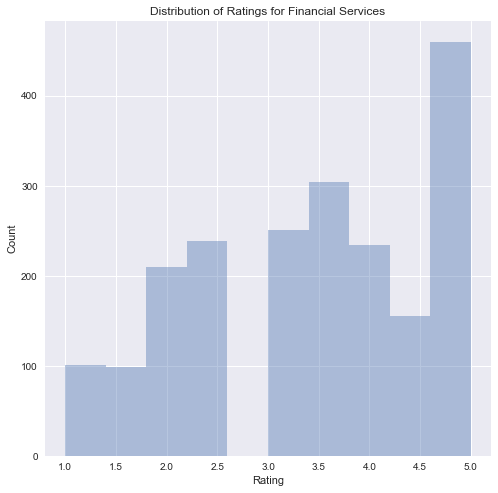

Mean: 3.418169
Min: 1.000000
Max: 5.000000


In [281]:
sns.set(rc={"figure.figsize": (8, 8)})

data = business_df[business_df['Financial Services'] == 1]['stars']
sns.distplot(data, kde=False, bins=10)

# Add headers and labels to the plot
plt.title('Distribution of Ratings for Financial Services')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print("Mean: %f" % data.mean())
print("Min: %f" % data.min())
print("Max: %f" % data.max())

#### Count of Banks & Credit Unions and their Categories

In [282]:
# Count the number of non-null attributes 
nonnull_attributes_count = business_df[business_df['Banks & Credit Unions'] == 1][numeric_attributes].notnull().sum()

# Sort the attribute counts
sorted_attributes = nonnull_attributes_count.sort_values(ascending=[False])

# Print the top 20
print(sorted_attributes)

attributes.RestaurantsPriceRange2    11
dtype: int64


In [283]:
# Count the number of Banks and Credit Unions are in each category
banks_category_counts = business_df[business_df['Banks & Credit Unions'] == 1][categories].sum()

# Sort the category counts
sorted_categories = banks_category_counts.sort_values(ascending=False)

# Print the top 20
sorted_categories[:20]

Financial Services             950
Banks & Credit Unions          950
Real Estate                    190
Home Services                  190
Mortgage Brokers               189
Automotive                      43
Auto Loan Providers             40
Insurance                       31
Financial Advising              26
Mortgage Lenders                23
Auto Insurance                  21
Home & Rental Insurance         21
Check Cashing/Pay-day Loans     19
Business Financing              13
Investing                       13
Shopping                         9
Title Loans                      9
Real Estate Services             8
Pawn Shops                       7
Local Services                   7
dtype: int64

#### Distribution of Ratings for Banks, Credit Unions


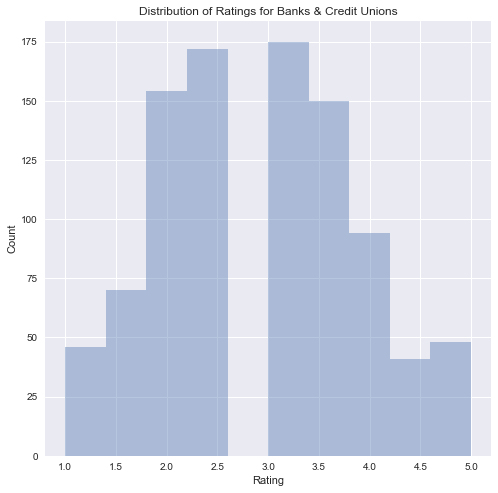

Mean: 2.883684
Min: 1.000000
Max: 5.000000


In [284]:
sns.set(rc={"figure.figsize": (8, 8)})

data = business_df[business_df['Banks & Credit Unions'] == 1]['stars']
sns.distplot(data, kde=False, bins=10)

# Add headers and labels to the plot
plt.title('Distribution of Ratings for Banks & Credit Unions')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print("Mean: %f" % data.mean())
print("Min: %f" % data.min())
print("Max: %f" % data.max())

#### Count of Contractors and their Categories


In [285]:
# Count the number of non-null attributes 
nonnull_attributes_count = business_df[business_df['Contractors'] == 1][numeric_attributes].notnull().sum()

# Sort the attribute counts
sorted_attributes = nonnull_attributes_count.sort_values(ascending=[False])

# Print the top 20
print(sorted_attributes)

attributes.RestaurantsPriceRange2    157
dtype: int64


In [286]:
# Count the number of contractors are in each category
contractors_category_counts = business_df[business_df['Contractors'] == 1][categories].sum()

# Sort the category counts
sorted_categories = contractors_category_counts.sort_values(ascending=False)

# Print the top 20
sorted_categories[:20]

Contractors                        1939
Home Services                      1939
Shopping                            427
Home & Garden                       398
Local Services                      335
Plumbing                            227
Flooring                            192
Heating & Air Conditioning/HVAC     191
Kitchen & Bath                      151
Damage Restoration                  149
Pool & Hot Tub Service              142
Handyman                            126
Painters                            125
Building Supplies                   123
Roofing                             116
Landscaping                         116
Pool Cleaners                       115
Professional Services               115
Home Cleaning                       112
Masonry/Concrete                    110
dtype: int64

#### Distribution of Ratings for Contractors

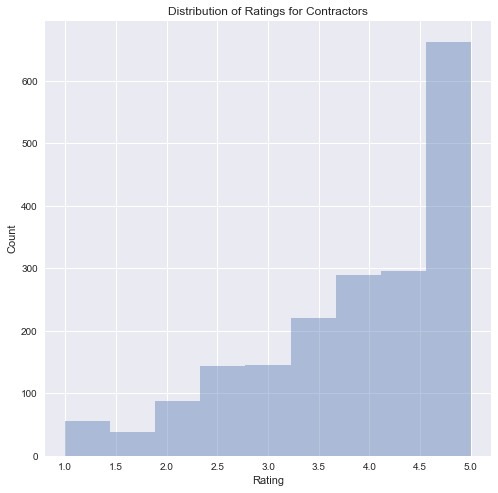

Mean: 3.949716
Min: 1.000000
Max: 5.000000


In [287]:
sns.set(rc={"figure.figsize": (8, 8)})

data = business_df[business_df['Contractors'] == 1]['stars']
sns.distplot(data, kde=False, bins=9)

# Add headers and labels to the plot
plt.title('Distribution of Ratings for Contractors')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print("Mean: %f" % data.mean())
print("Min: %f" % data.min())
print("Max: %f" % data.max())

#### Count of Restaurants and their Categories

In [288]:
# Count the number of non-null attributes 
nonnull_attributes_count = business_df[business_df['Restaurants'] == 1][numeric_attributes].notnull().sum()

# Sort the attribute counts
sorted_attributes = nonnull_attributes_count.sort_values(ascending=[False])

# Print the top 20
print(sorted_attributes)

attributes.RestaurantsPriceRange2    47314
dtype: int64


In [289]:
# Count the number of restaurants are in each category
restaurant_category_counts = business_df[business_df['Restaurants'] == 1][categories].sum()

# Sort the category counts
sorted_categories = restaurant_category_counts.sort_values(ascending=False)

# Print the top 20
sorted_categories[:20]

Restaurants                  51613
Food                          9599
Nightlife                     6969
Bars                          6690
Sandwiches                    5864
Fast Food                     5792
American (Traditional)        5737
Pizza                         5652
Italian                       4411
Burgers                       4236
Breakfast & Brunch            4103
Mexican                       3913
American (New)                3802
Chinese                       3775
Cafes                         2812
Coffee & Tea                  2365
Japanese                      2186
Chicken Wings                 2019
Seafood                       1981
Event Planning & Services     1860
dtype: int64

#### Distribution of Ratings for Restaurants

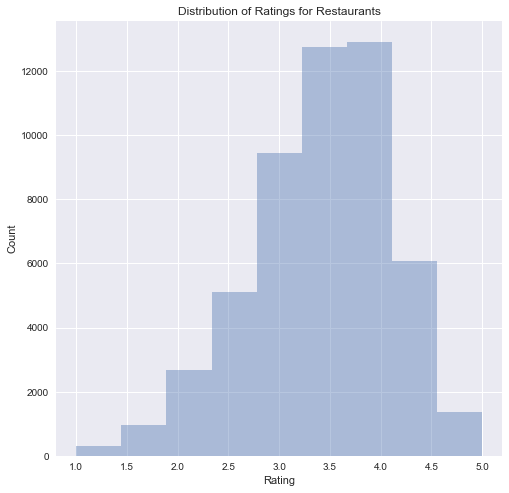

Mean: 3.461105
Min: 1.000000
Max: 5.000000


In [290]:
sns.set(rc={"figure.figsize": (8, 8)})

data = business_df[business_df['Restaurants'] == 1]['stars']
sns.distplot(data, kde=False, bins=9)

# Add headers and labels to the plot
plt.title('Distribution of Ratings for Restaurants')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print("Mean: %f" % data.mean())
print("Min: %f" % data.min())
print("Max: %f" % data.max())

#### Distribution of Ratings for Chinese Restaurants

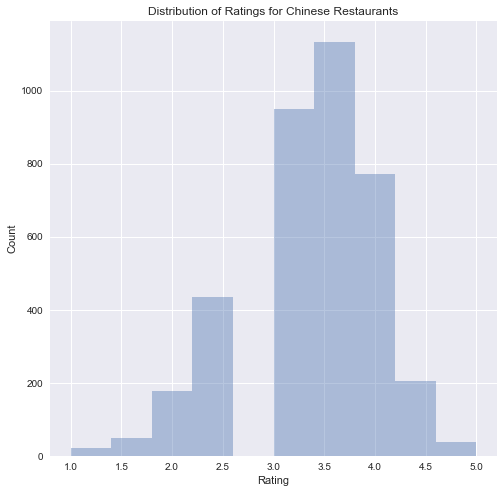

Mean: 3.320795
Min: 1.000000
Max: 5.000000


In [291]:
sns.set(rc={"figure.figsize": (8, 8)})

data = business_df[business_df['Chinese'] == 1]['stars']
sns.distplot(data, kde=False, bins=10)

# Add headers and labels to the plot
plt.title('Distribution of Ratings for Chinese Restaurants')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print("Mean: %f" % data.mean())
print("Min: %f" % data.min())
print("Max: %f" % data.max())

In [292]:
non_restaurant_categories = restaurant_category_counts[restaurant_category_counts <= 0].index.values

#### Top 10 Cities with the Most Businesses

In [293]:
business_df['city'].value_counts().head(10)

Las Vegas     24768
Phoenix       15656
Toronto       15483
Charlotte      7557
Scottsdale     7510
Pittsburgh     5688
Montréal       5175
Mesa           5146
Henderson      4130
Tempe          3949
Name: city, dtype: int64

#### Top 10 States with the Most Businesses

In [294]:
business_df['state'].value_counts().head(10)

AZ     47376
NV     30571
ON     26520
NC     11299
OH     10930
PA      8916
QC      7273
WI      4190
EDH     3561
BW      3071
Name: state, dtype: int64

###  Count of Ratings Recieved and Distribution

In [295]:
business_df['stars'].value_counts().head(10)

4.0    31529
3.5    28610
5.0    23818
4.5    22557
3.0    21815
2.5    13730
2.0     8331
1.5     3516
1.0     2733
Name: stars, dtype: int64

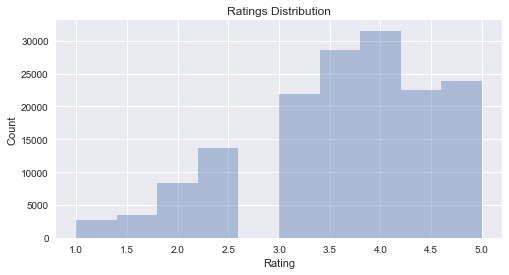

Mean: 3.647154
Min: 1.000000
Max: 5.000000


In [296]:
sns.set(rc={"figure.figsize": (8, 4)})

data = business_df['stars']
sns.distplot(data, kde=False, bins=10)

# Add headers and labels to the plot
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print("Mean: %f" % data.mean())
print ("Min: %f" % data.min())
print ("Max: %f" % data.max())